# Identifying factors correlated with banking crises in Asia: 1800 - 2016
- In this notebook, we attempt to model banking crises in a select group of Asian countries.
- We seek top identify macroeconomic and geopolitical events which occured immediately before, after or at the same time as banking crises in these countries, in the period 1800 - 2016.
- The hypothesis is that the occurence of these events in the present day may also correlate with banking crises in Asian countries.

### Dataset:
- I've used the dataset manintained by Carmen reinhart et al.,  available here: https://www.hbs.edu/behavioral-finance-and-financial-stability/data/Pages/global.aspx
- 13 asian countries chosen for the study: India, Sri Lanka, China, Taiwan, Korea, Indonesia, Japan, Malaysia, Myanmar, Philippines, Russia, Singapore, Thailand.

#### Objective:
- To predict whether a banking crisis (i.e. a host of banks in a state of illiquidity or insolvency ) might occur in a set of Asian countries, given set of other extenuating macroeconomic circumstances

#### Input variables:
##### Following input variables are boolean variables (i.e. 0 = No, 1 = Yes)
 - Systemic Crisis
 - Default on Domestic Debt
 - Default on Sovereign External Debt
 - Independence
 - Currency crises (insufficient currency avaiable with the reserve abnk to stabilize the exchange rate)
 - Inflation crises (period characterized by CPI inflation >= 20 %)
 - Gold Standard (whether the country followed the gold standard)

##### Methodology:
- Machine learning methods - specifically:
  1. Logistic Regression
   - Model Implementation using logistic regression classifier 
   - Model validation using confusion matrix and ROC curve
  
##### Assumptions:
- Banking crises can be predicted basis correlations with the specific set of macroeconomic events, reduced to Boolean inpu variables
- Where values were not avaialble in the dataset, the value is taken to be '0'

In [1]:
# import the relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

%matplotlib inline

In [2]:
#Importing dataset
df1 = pd.read_excel('20160923_global_crisis_data.xlsx', sheet_name = 'asia')

In [3]:
df1.shape

(2821, 12)

In [4]:
df1.columns

Index(['Case', 'CC3', 'Country', 'Year', 'Banking Crisis ', 'Systemic Crisis',
       'Gold Standard', 'Domestic_Debt_In_Default',
       'Sovereign_Debt_In_Default', 'Independence', 'Currency Crises',
       'Inflation Crises'],
      dtype='object')

In [5]:
df1.rename(columns = {'Country':'country', 'Year':'year', 'Banking Crisis ': 'banking_crisis', 'Systemic Crisis':'systemic_crisis', 'Gold Standard':'gold_standard','Currency Crises':'currency_crises','Inflation Crises':'inflation_crises'}, inplace = True)

In [6]:
df1.columns

Index(['Case', 'CC3', 'country', 'year', 'banking_crisis', 'systemic_crisis',
       'gold_standard', 'Domestic_Debt_In_Default',
       'Sovereign_Debt_In_Default', 'Independence', 'currency_crises',
       'inflation_crises'],
      dtype='object')

In [7]:
# selecting specific columns for the model
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2821 entries, 0 to 2820
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Case                       2821 non-null   int64 
 1   CC3                        2821 non-null   object
 2   country                    2821 non-null   object
 3   year                       2821 non-null   int64 
 4   banking_crisis             2821 non-null   int64 
 5   systemic_crisis            2821 non-null   int64 
 6   gold_standard              2821 non-null   int64 
 7   Domestic_Debt_In_Default   2821 non-null   int64 
 8   Sovereign_Debt_In_Default  2821 non-null   int64 
 9   Independence               2821 non-null   int64 
 10  currency_crises            2821 non-null   int64 
 11  inflation_crises           2821 non-null   int64 
dtypes: int64(10), object(2)
memory usage: 264.6+ KB


## Logistic Regression

In [8]:
# divide the data into attributes (dependent variables) and labels (indepenedent variable)
X = df1[['systemic_crisis',
       'gold_standard', 'Domestic_Debt_In_Default',
       'Sovereign_Debt_In_Default', 'Independence', 'currency_crises',
       'inflation_crises']]
Y = df1['banking_crisis']

In [9]:
len(Y)
print(X.shape, Y.shape)

(2821, 7) (2821,)


In [10]:
np.count_nonzero(Y)

140

In [14]:
count_no_crisis = len(Y) - np.count_nonzero(Y)
print(count_no_crisis)

count_crisis = np.count_nonzero(Y)
pct_of_no_crisis = count_no_crisis/(count_no_crisis+count_crisis)
print("percentage of no crisis is: ", pct_of_no_crisis*100)
pct_of_crisis = count_crisis/(count_no_crisis+count_crisis)
print("percentage of crisis is: ", pct_of_crisis*100)

2681
percentage of no crisis is:  95.03722084367246
percentage of crisis is:  4.962779156327544


Given that our classes are imbalanced, we'll use SMOTE to balance out our classes - specifically, oversampling technique

In [16]:
# Over-sampling using SMOTE
crisis = df1[df1['banking_crisis'] == 1]
no_crisis = df1[df1['banking_crisis']== 0]

In [17]:
print(crisis.shape, no_crisis.shape)

(140, 12) (2681, 12)


In [18]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss

In [21]:
os = SMOTETomek(random_state = 42)

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_Y = os.fit_sample(X_train, Y_train)
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))

count_crisis = np.count_nonzero(os_data_Y)
print("Number of crisis in oversampled data: ", count_crisis)

count_no_crisis = len(os_data_Y) - np.count_nonzero(os_data_Y)
print("Number of no crisis: ", count_no_crisis)
print("Proportion of no crisis data in oversampled data is ", count_no_crisis/len(os_data_X))
print("Proportion of crisis data in oversampled data is ",count_crisis/len(os_data_X))

length of oversampled data is  3756
Number of crisis in oversampled data:  1878
Number of no crisis:  1878
Proportion of no crisis data in oversampled data is  0.5
Proportion of crisis data in oversampled data is  0.5


Note that we've only used training dataset for oversampling - this will preserve the sanctity of the testing dataset

### Implementing the logistic regression classifier model

In [23]:
# compare counts before an after SMOTE oversampling
#from collections import Counter
#print("original dataset shape {}".format(Counter(Y)))
#print("new dataset shape {}".format(Counter(Y_res)))

In [24]:
X1 = os_data_X
Y1 = os_data_Y

In [25]:
import statsmodels.api as sm

In [26]:
log_reg_model = sm.Logit(Y1,X1)
result = log_reg_model.fit()
print(result.summary2())

         Current function value: 0.486263
         Iterations: 35


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                               Results: Logit
Model:                   Logit                Pseudo R-squared:     0.298    
Dependent Variable:      banking_crisis       AIC:                  3666.8093
Date:                    2020-10-18 12:55     BIC:                  3710.4270
No. Observations:        3756                 Log-Likelihood:       -1826.4  
Df Model:                6                    LL-Null:              -2603.5  
Df Residuals:            3749                 LLR p-value:          0.0000   
Converged:               0.0000               Scale:                1.0000   
No. Iterations:          35.0000                                             
-----------------------------------------------------------------------------
                           Coef.   Std.Err.    z    P>|z|    [0.025   0.975] 
-----------------------------------------------------------------------------
systemic_crisis             7.1684   0.6033 11.8813 0.0000    5.9859   8.3509
gold_standard     

In [41]:
# remove the variables where p values > 0.05, and re-run the regresion
X1 = os_data_X[['systemic_crisis', 'gold_standard', 'Sovereign_Debt_In_Default', 'currency_crises', 'inflation_crises']]
Y1 = os_data_Y
log_reg_model = sm.Logit(Y1,X1)
result = log_reg_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.489304
         Iterations 9
                             Results: Logit
Model:                 Logit               Pseudo R-squared:    0.294    
Dependent Variable:    banking_crisis      AIC:                 3685.6484
Date:                  2020-10-18 13:12    BIC:                 3716.8039
No. Observations:      3756                Log-Likelihood:      -1837.8  
Df Model:              4                   LL-Null:             -2603.5  
Df Residuals:          3751                LLR p-value:         0.0000   
Converged:             1.0000              Scale:               1.0000   
No. Iterations:        9.0000                                            
-------------------------------------------------------------------------
                           Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-------------------------------------------------------------------------
systemic_crisis            7.4517   0.56

now that p-values for all variables are below 5%, we can run the logistic regression model using sci-kit learn

### Model Validation

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, Y_train, Y_test = train_test_split(X1, Y1, test_size=0.3, random_state=42)
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

LogisticRegression()

In [44]:
Y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, Y_test)))

Accuracy of logistic regression classifier on test set: 0.75


### Confusion Matrix

In [45]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test, Y_pred)
print(confusion_matrix)

[[577   3]
 [277 270]]


Thus, we see that we have 577 + 270 = 847 correct predictions and 277 + 3 = 280 incorrect predictions as per the logistic regression classifier model.
The false positive rate and true positive rate can be visualized using the ROC curve.

### ROC Curve

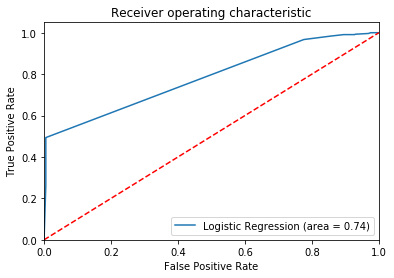

In [46]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(Y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### Conclusion :
The model indicates that banking crises in Asia may be  correlated with following factors : 
- systemic_crisis
- gold standard
- Sovereign Debt in Default
- currency crisis
- inflation crisis

The model can be further improved by adding further variables.